In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from datetime import datetime



ModuleNotFoundError: No module named 'yfinance'

In [9]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 3.5 MB/s eta 0:00:00
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 19.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 40.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.9 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, ru

In [277]:
#%pip install pandas 
#%pip install matplotlib.pyplot 
#%pip install t seaborn 
#%pip install numpy
#%pip install yfinance 

In [278]:
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV.
df_btc = pd.read_csv('../CSV/df_btc.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/df_sp500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/df_gold.csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
#df_btc.set_index('Date', inplace=True)
#df_sp500.set_index('Date', inplace=True)
#df_gold.set_index('Date', inplace=True)


In [279]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
                      Date     Close/Last           High            Low  \
count                 1828    1828.000000    1828.000000    1828.000000   
mean   2022-08-13 12:00:00   38432.723787   39228.154763   37516.246741   
min    2020-02-12 00:00:00    4970.788086    5331.833984    4106.980957   
25%    2021-05-13 18:00:00   20588.993652   20992.409668   20155.566406   
50%    2022-08-13 12:00:00   34632.855469   35352.632812   33484.929688   
75%    2023-11-13 06:00:00   54817.337891   56647.227539   53351.402344   
max    2025-02-12 00:00:00  106146.265625  109114.882812  105291.734375   
std                    NaN   22747.948801   23210.682924   22219.168295   

                Open        Volume  
count    1828.000000  1.828000e+03  
mean    38388.186494  3.372781e+10  
min      5002.578125  5.331173e+09  
25%     20568.209961  2.064499e+10  
50%     34569.574219  3.020514e+10  
75%     54753.849609  4.104857e+10  
max    106147.296875  3.5096

In [280]:
df_btc.head()

,Date,Close/Last,High,Low,Open,Volume
0,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,43444303830
1,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,49356071373
2,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,43338264162
3,2020-02-15,9889.424805,10341.555664,9874.427734,10313.856445,43865054831
4,2020-02-16,9934.433594,10053.968750,9722.386719,9889.179688,43374780305


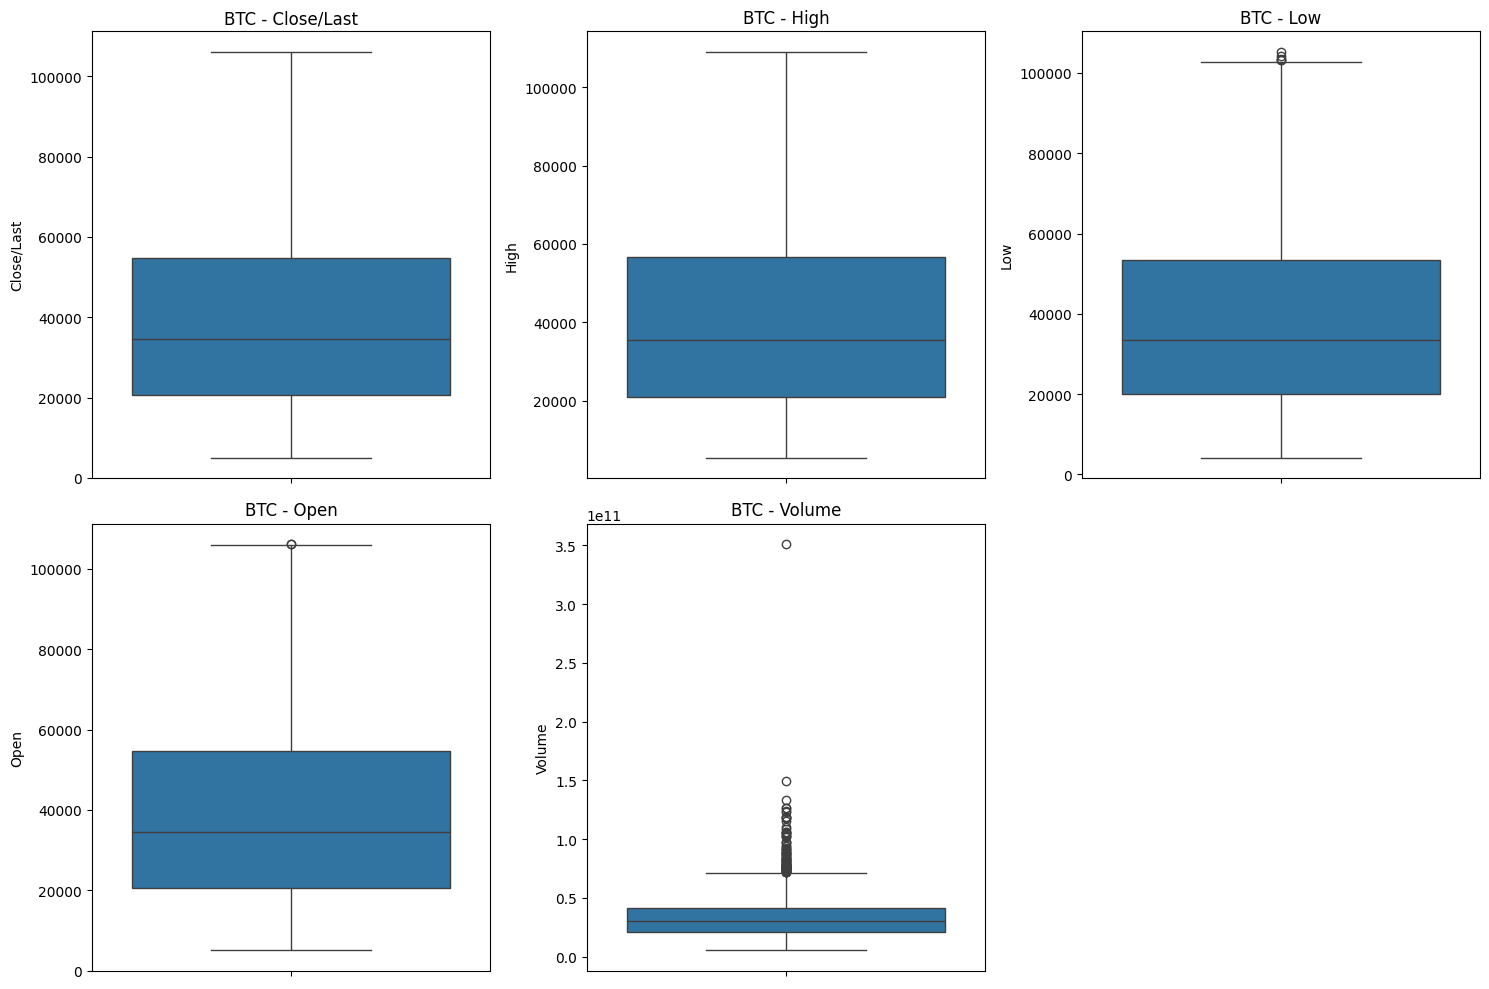

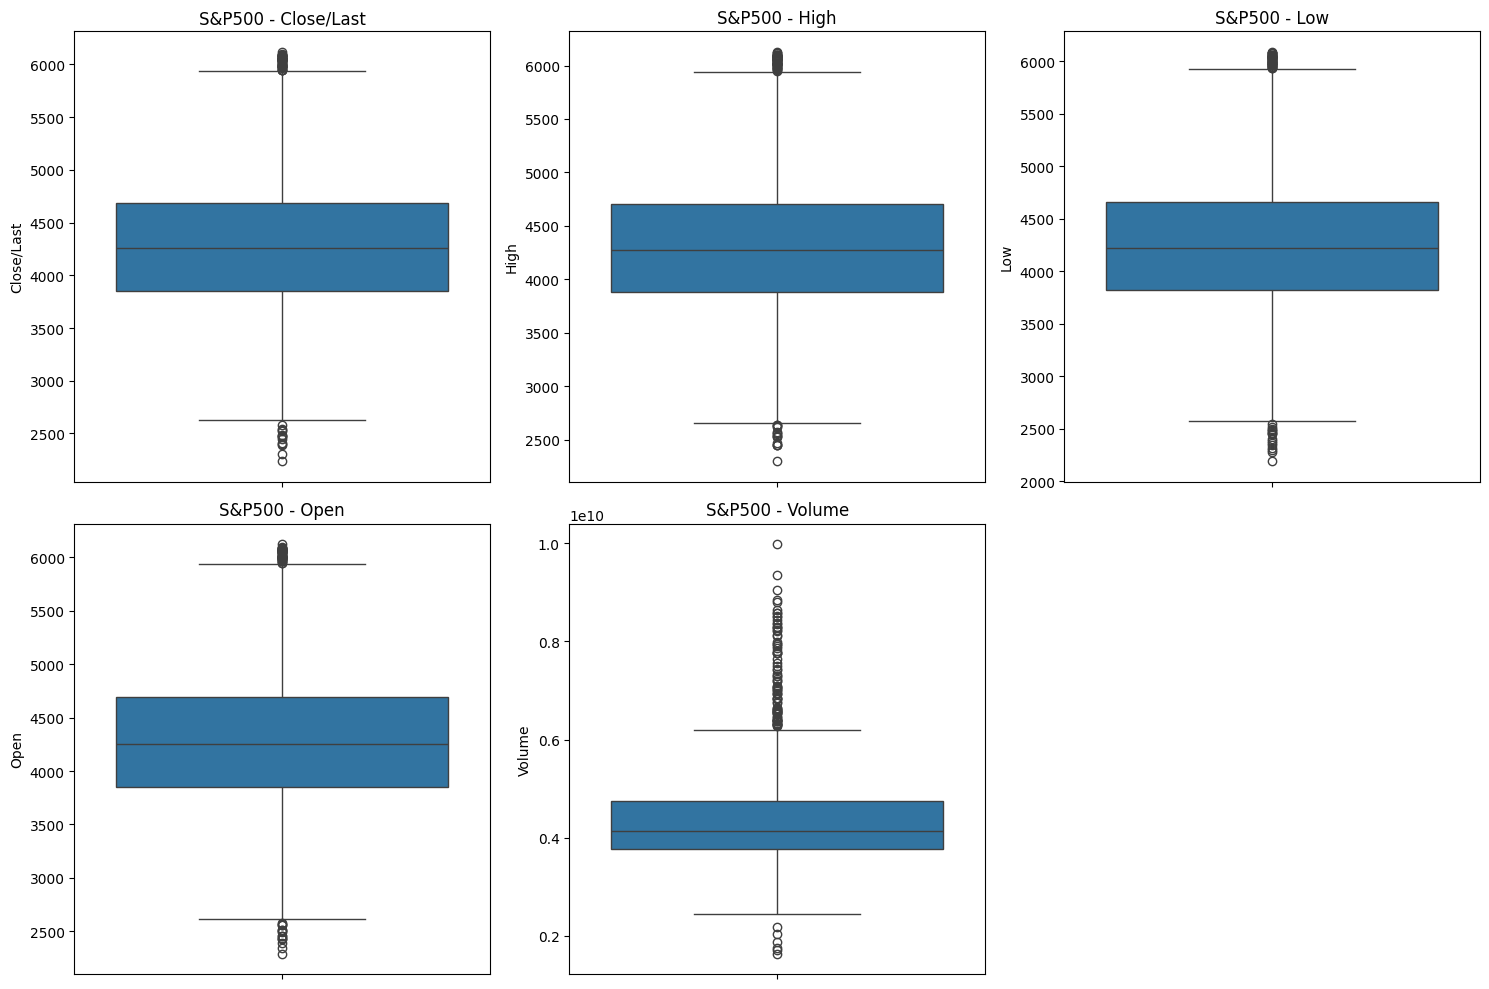

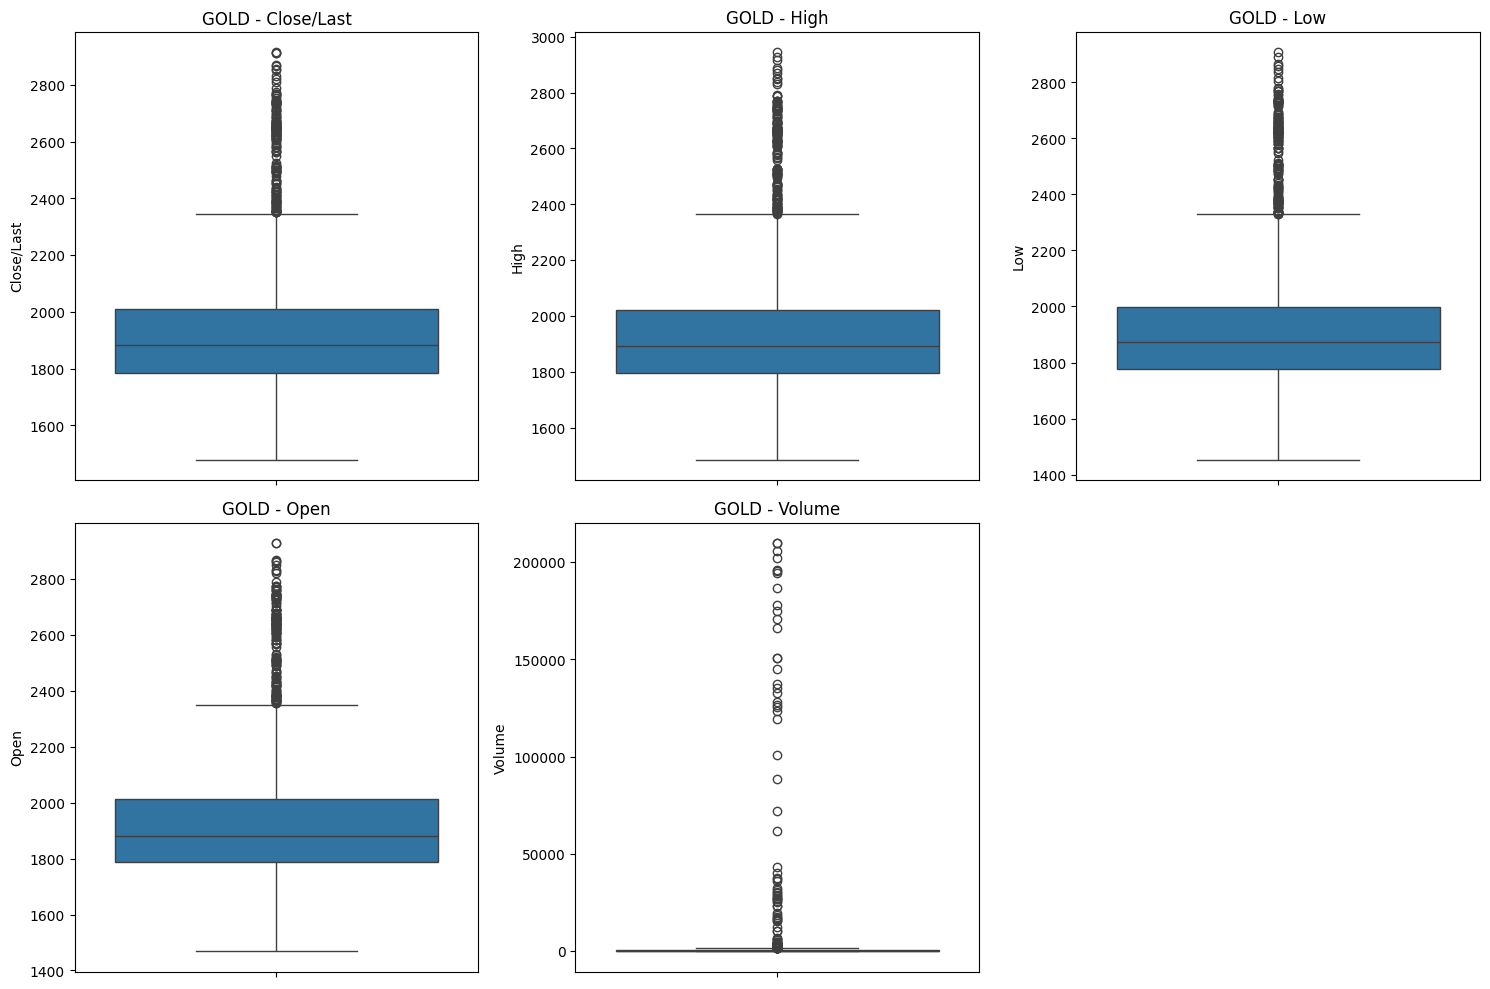

In [281]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [282]:
df_btc.head()


,Date,Close/Last,High,Low,Open,Volume
0,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,43444303830
1,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,49356071373
2,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,43338264162
3,2020-02-15,9889.424805,10341.555664,9874.427734,10313.856445,43865054831
4,2020-02-16,9934.433594,10053.968750,9722.386719,9889.179688,43374780305


In [283]:
import matplotlib.pyplot as plt

        Date     BTC_Close      BTC_High       BTC_Low      BTC_Open  \
0 2020-02-12  10326.054688  10393.611328  10202.387695  10202.387695   
1 2020-02-13  10214.379883  10457.626953  10116.161133  10323.960938   
2 2020-02-14  10312.116211  10321.996094  10125.534180  10211.550781   
3 2020-02-18  10141.996094  10161.935547   9632.382812   9691.230469   
4 2020-02-19   9633.386719  10191.675781   9611.223633  10143.798828   

      Volume_x  SP500_Close   SP500_High    SP500_Low   SP500_Open  \
0  43444303830  3379.449951  3381.469971  3369.719971  3370.500000   
1  49356071373  3373.939941  3385.090088  3360.520020  3365.899902   
2  43338264162  3380.159912  3380.689941  3366.149902  3378.080078   
3  47271023953  3370.290039  3375.010010  3355.610107  3369.040039   
4  46992019710  3386.149902  3393.520020  3378.830078  3380.389893   

     Volume_y   Gold_Close    Gold_High     Gold_Low    Gold_Open  Volume  
0  3930910000  1567.400024  1568.699951  1561.000000  1565.199951     

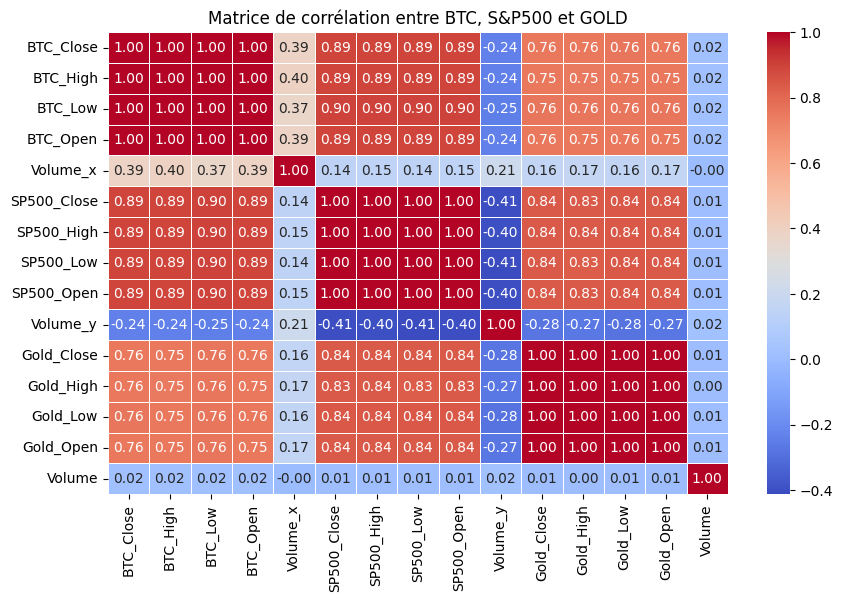

In [284]:
# ✅ Renommer les colonnes pour éviter les conflits après fusion
df_btc.rename(columns={"Close/Last": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close/Last": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close/Last": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ✅ Fusionner les datasets sur la colonne "Date"
df_merged = df_btc.merge(df_sp500, on="Date").merge(df_gold, on="Date")

# ✅ Vérification des données après fusion
print(df_merged.head())

# ✅ Sélectionner uniquement les colonnes numériques pour la corrélation
df_corr = df_merged.drop(columns=["Date"])

# ✅ Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# ✅ Affichage avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre BTC, S&P500 et GOLD")
plt.show()


In [285]:
# ✅ Vérification de la colonne de prix dans chaque dataset
def check_price_column(df, asset_name):
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }

    if asset_name in price_columns:
        price_col = price_columns[asset_name]
    else:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu dans la liste des actifs.")
        return None, df  

    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return None, df  

    print(f"✅ La colonne '{price_col}' est bien trouvée pour {asset_name}.")
    return price_col, df  

# ✅ Calcul des rendements, volatilité et Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    df["Date"] = pd.to_datetime(df["Date"])  
    df = df.sort_values("Date")  
    df = df.set_index("Date")  

    price_col, df = check_price_column(df, asset_name)
    if price_col is None:  
        return df  

    # 📈 Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # 📊 Volatilité (écart-type des rendements)
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # 🔥 Ratio de Sharpe (en supposant un taux sans risque de 2% par an)
    sharpe_ratio = (df["Daily Return"].mean() * 252 - risk_free_rate) / (daily_volatility * np.sqrt(252))

    # 🎯 Affichage des résultats
    print(f"\n📊 Statistiques pour {asset_name}:")
    print(f"✅ Rendement Quotidien Moyen: {df['Daily Return'].mean():.4%}")
    print(f"✅ Rendement Mensuel Moyen: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Rendement Annuel Moyen: {df['Annual Return'].mean():.4%}")
    print(f"📉 Volatilité Quotidienne: {daily_volatility:.4%}")
    print(f"📉 Volatilité Mensuelle: {monthly_volatility:.4%}")
    print(f"📉 Volatilité Annuelle: {annual_volatility:.4%}")
    print(f"⚖️ Ratio de Sharpe: {sharpe_ratio:.2f}")

    return df

In [286]:
print(f"📌 Colonnes disponibles dans {asset_name} :", df.columns)


📌 Colonnes disponibles dans Or (GOLD) : Index(['Gold_Close', 'Gold_High', 'Gold_Low', 'Gold_Open', 'Volume',
       'Daily Return', 'Monthly Return', 'Annual Return'],
      dtype='object')


In [287]:
print(df.dtypes)  # Vérifie si "Date" est bien un objet (string) ou datetime


Gold_Close        float64
Gold_High         float64
Gold_Low          float64
Gold_Open         float64
Volume              int64
Daily Return      float64
Monthly Return    float64
Annual Return     float64
dtype: object


In [288]:
print(df["Date"].isna().sum())


KeyError: 'Date'

In [ ]:
print(df.index)  # Vérifie si la colonne Date est déjà l'index
df = df.reset_index()  # Remet tout à plat


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2025-01-24', '2025-01-27', '2025-01-28', '2025-01-29',
               '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04',
               '2025-02-05', '2025-02-06'],
              dtype='datetime64[ns]', name='Date', length=2539, freq=None)


In [ ]:
# ✅ Vérification et renommage des colonnes
df_btc.rename(columns={"Close/Last": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close/Last": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close/Last": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ✅ Vérification de la colonne Date
for df, asset in zip([df_btc, df_sp500, df_gold], ["BTC", "SP500", "GOLD"]):
    if "Date" not in df.columns:
        print(f"❌ Erreur : La colonne 'Date' est absente dans {asset} !")
    else:
        df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date au bon format
        df.sort_values("Date", inplace=True)  # Trier les données
        df.set_index("Date", inplace=True)  # Définir Date comme index

# ✅ Fonction pour calculer les rendements, la volatilité et le Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    # Vérifier et récupérer la colonne de prix
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }
    
    if asset_name not in price_columns:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu.")
        return df
    
    price_col = price_columns[asset_name]

    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Colonnes disponibles :", df.columns)
        return df  

    # ✅ Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # ✅ Calcul de la volatilité
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # ✅ Calcul du Sharpe Ratio
    sharpe_ratio = (df["Annual Return"].mean() - risk_free_rate) / annual_volatility if annual_volatility > 0 else np.nan

    # 📊 ✅ Affichage des résultats
    print(f"\n📊 **Résultats pour {asset_name}** :")
    print(f"✅ Rendement quotidien moyen : {df['Daily Return'].mean():.4%}")
    print(f"✅ Rendement mensuel moyen : {df['Monthly Return'].mean():.4%}")
    print(f"✅ Rendement annuel moyen : {df['Annual Return'].mean():.4%}")

    print(f"\n📈 **Volatilité :**")
    print(f"📌 Quotidienne : {daily_volatility:.4%}")
    print(f"📌 Mensuelle : {monthly_volatility:.4%}")
    print(f"📌 Annuelle : {annual_volatility:.4%}")

    print(f"\n📉 **Ratio de Sharpe :** {sharpe_ratio:.4f}")

    return df

# ✅ Exécuter la fonction pour chaque actif
df_btc = compute_returns(df_btc, "BTC")
df_sp500 = compute_returns(df_sp500, "SP500")
df_gold = compute_returns(df_gold, "GOLD")


📊 **Résultats pour BTC** :
✅ Rendement quotidien moyen : 0.1793%
✅ Rendement mensuel moyen : 6.1212%
✅ Rendement annuel moyen : 67.9687%

📈 **Volatilité :**
📌 Quotidienne : 3.3455%
📌 Mensuelle : 19.7664%
📌 Annuelle : 96.6439%

📉 **Ratio de Sharpe :** 0.6826

📊 **Résultats pour SP500** :
✅ Rendement quotidien moyen : 0.0557%
✅ Rendement mensuel moyen : 1.3486%
✅ Rendement annuel moyen : 25.1009%

📈 **Volatilité :**
📌 Quotidienne : 1.3455%
📌 Mensuelle : 5.3521%
📌 Annuelle : 2.5341%

📉 **Ratio de Sharpe :** 9.1161

📊 **Résultats pour GOLD** :
✅ Rendement quotidien moyen : 0.0546%
✅ Rendement mensuel moyen : 1.2495%
✅ Rendement annuel moyen : 12.0087%

📈 **Volatilité :**
📌 Quotidienne : 1.0274%
📌 Mensuelle : 4.1290%
📌 Annuelle : 21.8834%

📉 **Ratio de Sharpe :** 0.4574


C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\1910110064.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\1910110064.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\1910110064.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\1910110064.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipyk

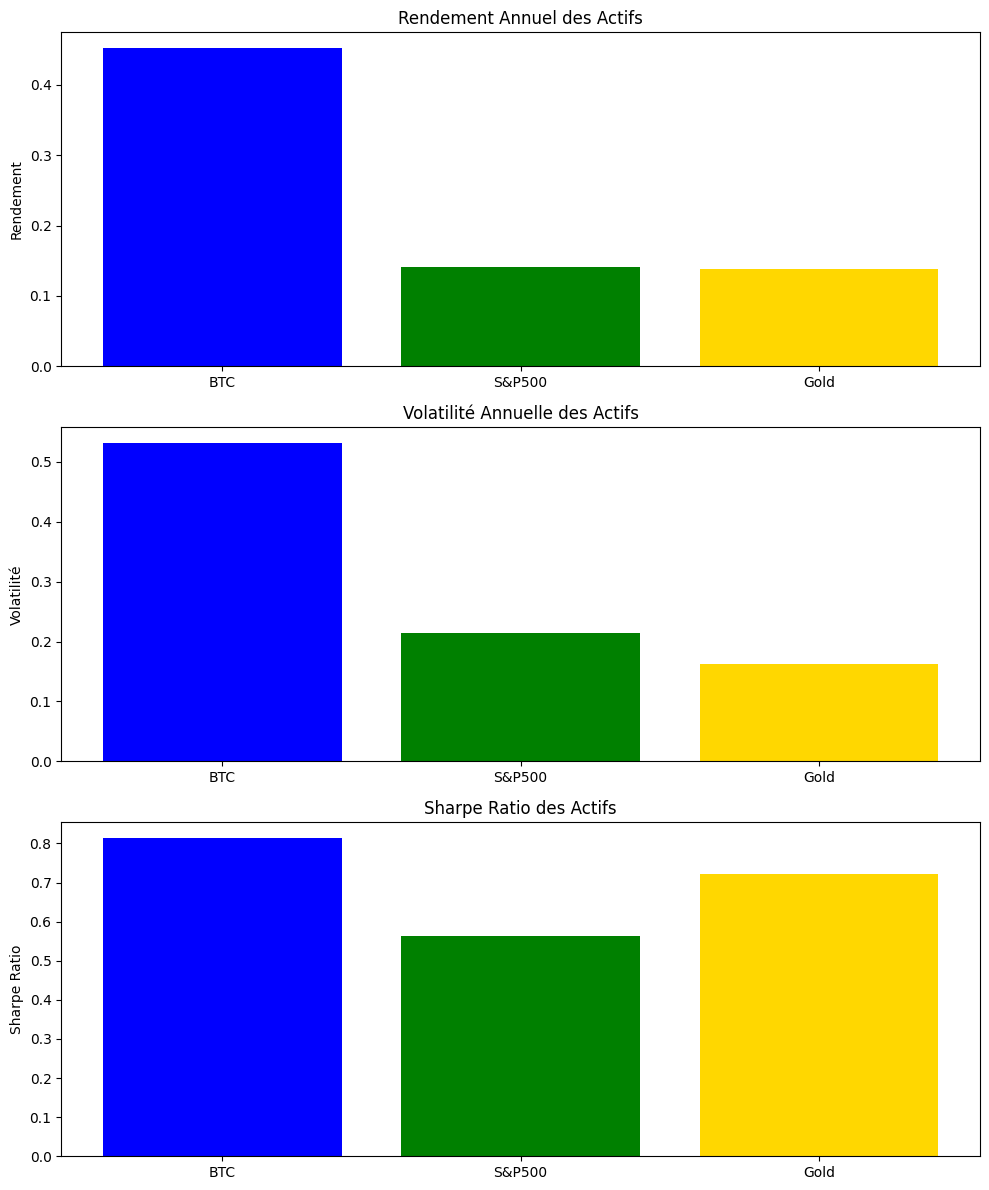

In [14]:
# Charger les données (exemple, remplacez par vos fichiers)
df_btc = pd.read_csv('../CSV/df_btc.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/df_sp500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/df_gold.csv', parse_dates=['Date'])

# Mettre la date en index
df_btc.set_index('Date', inplace=True)
df_sp500.set_index('Date', inplace=True)
df_gold.set_index('Date', inplace=True)

# Calcul du rendement journalier
df_btc['Returns'] = df_btc['Close'].pct_change()
df_sp500['Returns'] = df_sp500['Close'].pct_change()
df_gold['Returns'] = df_gold['Close'].pct_change()

# Calcul du rendement moyen et de la volatilité annuelle
annual_return = {
    'BTC': df_btc['Returns'].mean() * 252,
    'S&P500': df_sp500['Returns'].mean() * 252,
    'Gold': df_gold['Returns'].mean() * 252
}

annual_volatility = {
    'BTC': df_btc['Returns'].std() * np.sqrt(252),
    'S&P500': df_sp500['Returns'].std() * np.sqrt(252),
    'Gold': df_gold['Returns'].std() * np.sqrt(252)
}

# Supposons un taux sans risque de 2%
risk_free_rate = 0.02

sharpe_ratios = {asset: (annual_return[asset] - risk_free_rate) / annual_volatility[asset] 
                 for asset in annual_return}

# Création des graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Rendement annuel
axes[0].bar(annual_return.keys(), annual_return.values(), color=['blue', 'green', 'gold'])
axes[0].set_title('Rendement Annuel des Actifs')
axes[0].set_ylabel('Rendement')

# Volatilité annuelle
axes[1].bar(annual_volatility.keys(), annual_volatility.values(), color=['blue', 'green', 'gold'])
axes[1].set_title('Volatilité Annuelle des Actifs')
axes[1].set_ylabel('Volatilité')

# Sharpe Ratio
axes[2].bar(sharpe_ratios.keys(), sharpe_ratios.values(), color=['blue', 'green', 'gold'])
axes[2].set_title('Sharpe Ratio des Actifs')
axes[2].set_ylabel('Sharpe Ratio')

plt.tight_layout()
plt.show()

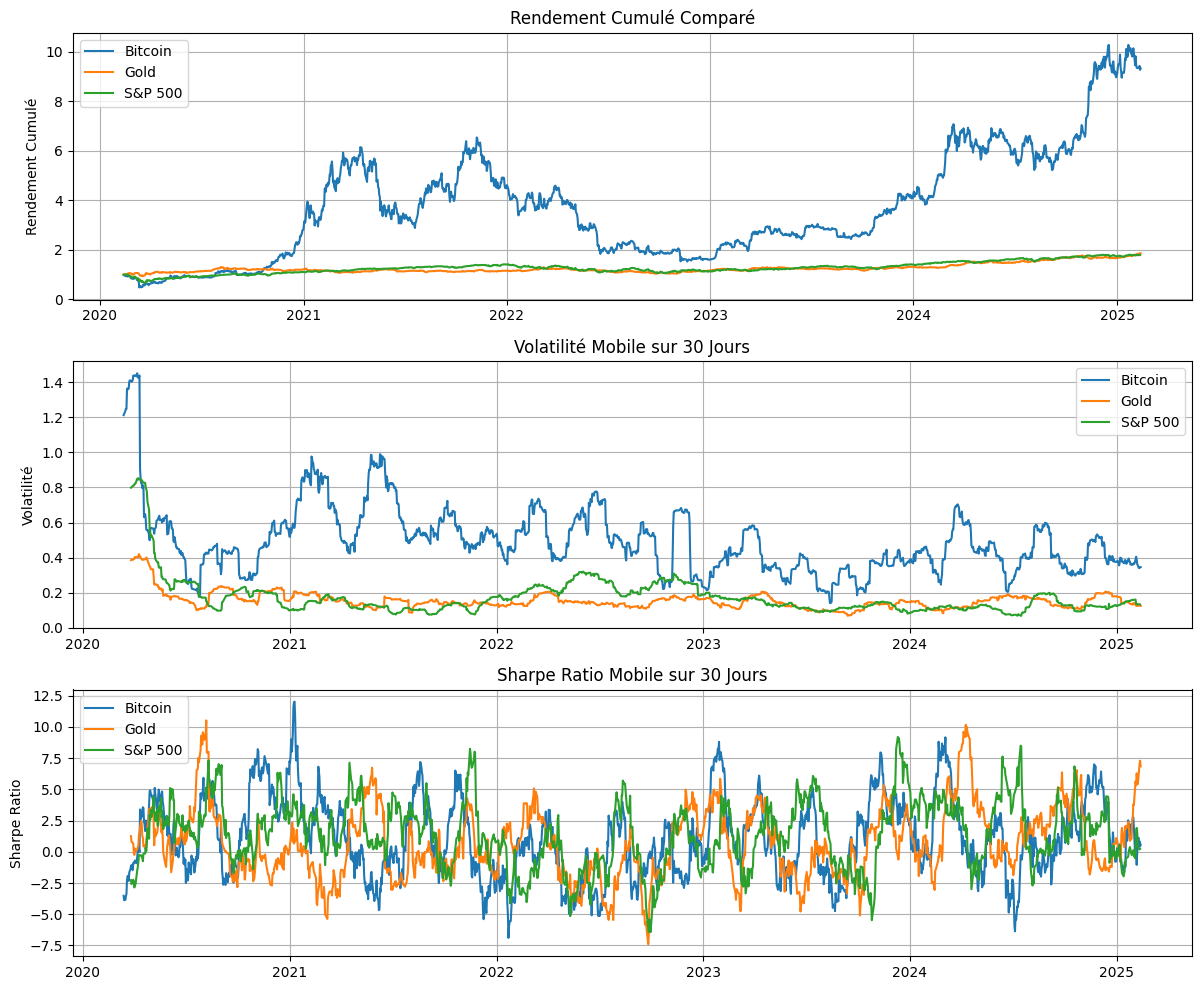

In [15]:
# Charger les données
df_btc = pd.read_csv('../CSV/df_btc.csv', parse_dates=['Date'], index_col='Date')
df_gold = pd.read_csv('../CSV/df_gold.csv', parse_dates=['Date'], index_col='Date')
df_sp500 = pd.read_csv('../CSV/df_sp500.csv', parse_dates=['Date'], index_col='Date')

# Calcul des rendements quotidiens
df_btc['Returns'] = df_btc['Close'].pct_change()
df_gold['Returns'] = df_gold['Close'].pct_change()
df_sp500['Returns'] = df_sp500['Close'].pct_change()

# Paramètres
risk_free_rate = 0.02  # Taux sans risque (2%)
trading_days = 252  # Nombre de jours de trading par an

# Calcul des statistiques
assets = {'Bitcoin': df_btc, 'Gold': df_gold, 'S&P 500': df_sp500}

# Tracer les graphiques de rendement, volatilité et Sharpe Ratio
grid_size = (3, 1)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

for i, (asset, df) in enumerate(assets.items()):
    df['Cumulative Returns'] = (1 + df['Returns']).cumprod()
    df['Rolling Volatility'] = df['Returns'].rolling(window=30).std() * np.sqrt(trading_days)
    rolling_sharpe = (df['Returns'].rolling(window=30).mean() * trading_days - risk_free_rate) / df['Rolling Volatility']
    
    axes[0].plot(df.index, df['Cumulative Returns'], label=asset)
    axes[1].plot(df.index, df['Rolling Volatility'], label=asset)
    axes[2].plot(df.index, rolling_sharpe, label=asset)

# Configurer les graphiques
axes[0].set_title('Rendement Cumulé Comparé')
axes[0].set_ylabel('Rendement Cumulé')
axes[0].legend()
axes[0].grid()

axes[1].set_title('Volatilité Mobile sur 30 Jours')
axes[1].set_ylabel('Volatilité')
axes[1].legend()
axes[1].grid()

axes[2].set_title('Sharpe Ratio Mobile sur 30 Jours')
axes[2].set_ylabel('Sharpe Ratio')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()
